In [1]:
import sys

sys.path.append("/home/ppeczek/Dokumenty/repositories/YOLOv8-serving/client")

In [23]:
from yolov8_client.client import YoloClient
from yolov8_client.visualisation import annotate_image
from yolov8_client.entities import Detection

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [4]:
IMAGE_1_PATH = "./assets/barcelona.jpg"
IMAGE_1 = cv.imread(IMAGE_1_PATH)

IMAGE_2_PATH = "./assets/people.jpg"
IMAGE_2 = cv.imread(IMAGE_2_PATH)

VIDEO_PATH = "./assets/movie.mp4"

In [5]:
CLIENT = YoloClient()

In [6]:
CLIENT.check_service_status()

'Healthy'

### Warm-up calls

In [7]:
from tqdm import tqdm

In [10]:
for _ in tqdm(CLIENT.predict_on_stream((IMAGE_1 for _ in range(64)))):
    pass

64it [00:02, 29.69it/s]


### Predicting on image file

In [11]:
image, image_detection = CLIENT.predict_on_item(
    source=IMAGE_1_PATH
)
annotated_image = annotate_image(image=image, image_detection=image_detection)

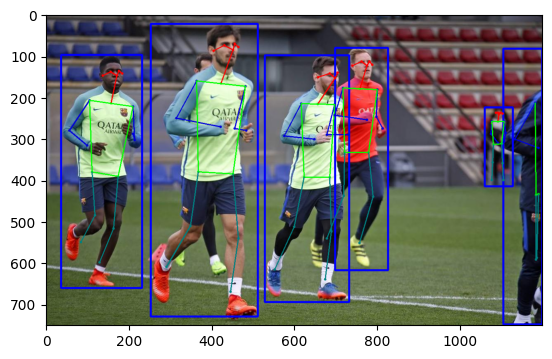

In [15]:
plt.imshow(annotated_image[:, :, ::-1])
plt.show()

### Predicting on image

In [16]:
image, image_detection = CLIENT.predict_on_item(
    source=IMAGE_2
)
annotated_image = annotate_image(image=image, image_detection=image_detection)

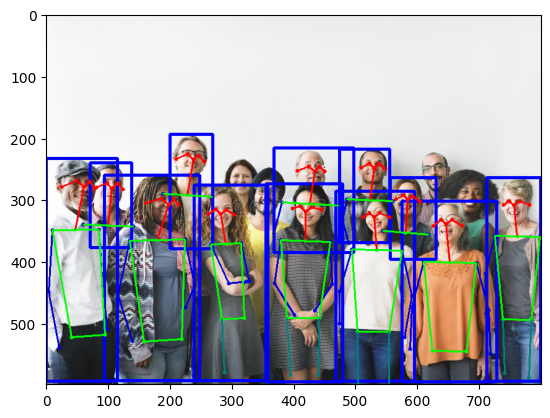

In [17]:
plt.imshow(annotated_image[:, :, ::-1])
plt.show()

### Inference on stream

In [20]:
import time

ELEMENTS = 1024

start = time.time()
results = []
for _, prediction in tqdm(CLIENT.predict_on_stream((
    IMAGE_1 if i % 2 == 0 else IMAGE_2 for i in range(ELEMENTS)
))):
    results.append(prediction)
    
end = time.time()

duration = end - start
throughput = ELEMENTS / duration

print(f"Achieved {round(throughput, 2)} rps.")

1024it [00:44, 22.87it/s]

Achieved 22.82 rps.


### Inference on video file

In [21]:
for image, prediction in tqdm(CLIENT.predict_on_stream(VIDEO_PATH)):
    annotated_image = annotate_image(image=image, image_detection=prediction)
    cv.imshow("Pose estimation video", annotated_image)
    cv.waitKey(25)
cv.destroyAllWindows()

2338it [01:20, 29.00it/s]


### Transforming predictins into custom format

In [24]:
def my_transform(detection: Detection) -> tuple:
    # returns only BBoxes coordinates
    return detection.bounding_box.left_top_absolute.to_tuple() + \
        detection.bounding_box.right_bottom_absolute.to_tuple()



image, image_detection = CLIENT.predict_on_item(
    source=IMAGE_1_PATH,
    prediction_transform=my_transform,
)

In [26]:
np.array(image_detection)

array([[  36,   96,  232,  660],
       [ 253,   21,  512,  729],
       [ 529,   97,  733,  694],
       [1106,   81, 1200,  748],
       [ 699,   79,  827,  617],
       [1061,  223, 1129,  414]])